In [1]:
import pandas as pd

df = pd.read_csv("data/Boston_2013_to_2018.csv")

In [2]:
df.head()

,c,NAME,DEPARTMENT_NAME,TITLE,REGULAR,RETRO,OTHER,OVERTIME,INJURED,DETAIL,QUINN,TOTAL_EARNINGS,POSTAL,year
0,1,"Williams,David C.",Boston Police Department,Police Officer,95184.68,NaN,503025.78,45176.88,5307.62,24610,4375.69,677680.65,2356,2018
1,2,"Earley,John W",Boston Police Department,Police Lieutenant,26130.54,13001.47,204120.61,668.36,NaN,440,6532.63,250893.61,2131,2018
2,3,"Bucelewicz,Helen",Boston Police Department,Police Officer,8676.89,NaN,200000,NaN,NaN,NaN,NaN,208676.89,2135,2018
3,4,"Evans,William B",Boston Police Department,Commissioner (Bpd),149999.93,3461.56,165858.44,NaN,NaN,NaN,NaN,319319.93,2127,2018
4,5,"Jones,Ronnie C",Boston Police Department,Police Officer,462149.98,NaN,114973.46,NaN,NaN,NaN,NaN,577123.44,2126,2018


In [3]:
df_cleaned = df.iloc[:, 4:11].fillna(0)
df_cleaned = df_cleaned.replace('[\$,]', '', regex=True).astype(float)

In [4]:
import numpy as np

cleaned_data = df_cleaned.to_numpy(dtype = np.float64)
pay_in_type = cleaned_data.sum(axis = 0) 
pay_type_prop = pay_in_type / pay_in_type.sum()
pay_type = list(map(lambda x:x.lower().capitalize(), df.columns[4:11].tolist()))

In [5]:
df_output = pd.DataFrame(pay_type_prop.reshape(-1, 1), index = pay_type)

In [6]:
df_output

,0
Regular,0.592547
Retro,0.028720
Other,0.035604
Overtime,0.172403
Injured,0.027188
Detail,0.095320
Quinn,0.048218


# Result 

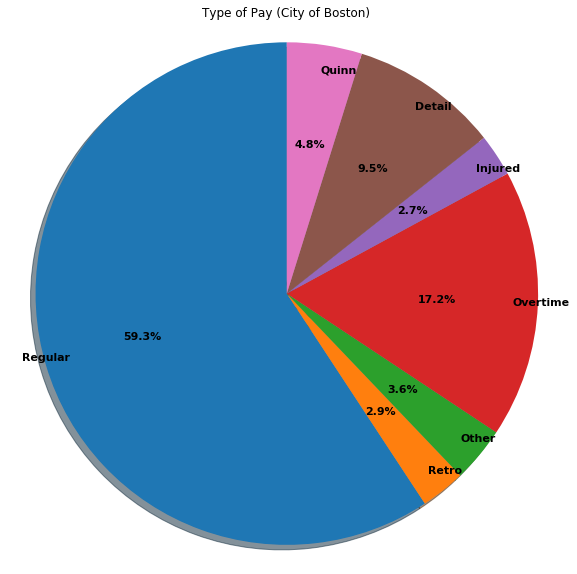

In [24]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.figure(figsize = (10, 10))
_, texts, autopcts = plt.pie(pay_type_prop, labels = pay_type, autopct='%1.1f%%',
        shadow=True, startangle=90, labeldistance = 0.9)

# Font settings
plt.setp(autopcts, **{
    'weight':'bold', 
    'fontsize':11})
plt.setp(texts, **{
    'weight':'bold', 
    'fontsize':11})

plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title("Type of Pay (City of Boston)")
plt.savefig("type_of_pay.png")
plt.show()